# <font color='springgreen'> Import necessary libraries

Pavia University scene is a HSI which means it is essentialy an image. 
It is in *.mat* file so we use *loadmat* from *scipy* to load these data. The first two data that we load, are the ones that can be accessed through the official web page. The last one is the data that is given to us by our Teacher Assistent (TA). Honestly I have no idea what this *.npy* file is since it comes with 0 information. nevertheless, I loaded it in my code so that it might come in handy at some point. 

In [181]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

path_pavia   = '../Data/Pavia/PaviaU.mat'
path_paviagt = '../Data/Pavia/PaviaU_gt.mat'
path_npy     = '../Data/PVI/pavia.npy'


pavia       = loadmat(path_pavia)
paviagt     = loadmat(path_paviagt)
pavia_npy   = np.load(path_temp)


## <font color='springgreen'> Data

we can easily print the information which was within those files. As you can see, these information (the first two) require some later filtering to be used in our code

In [182]:
pavia

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:21:46 2011',
 '__version__': '1.0',
 '__globals__': [],
 'paviaU': array([[[ 647,  499,  464, ..., 3221, 3238, 3250],
         [ 604,  546,  527, ..., 2442, 2464, 2528],
         [ 621,  746,  556, ..., 2308, 2345, 2361],
         ...,
         [ 524,  525,  598, ..., 2936, 2940, 2950],
         [ 528,  330,   70, ..., 2737, 2774, 2829],
         [ 711,  483,  423, ..., 2562, 2539, 2488]],
 
        [[ 705,  681,  668, ..., 2607, 2607, 2609],
         [ 891,  692,  453, ..., 1581, 1561, 1522],
         [ 547,  511,  604, ..., 1535, 1531, 1538],
         ...,
         [1149,  658,  434, ..., 3247, 3251, 3277],
         [ 917, 1004,  743, ..., 2828, 2806, 2808],
         [1037,  849,  547, ..., 2491, 2527, 2522]],
 
        [[1084,  875,  706, ..., 2108, 2167, 2183],
         [ 335,  517,  611, ..., 1105, 1109, 1095],
         [1042,  683,  318, ...,  806,  791,  814],
         ...,
         [ 799,  693,  

In [183]:
paviagt

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:25:52 2011',
 '__version__': '1.0',
 '__globals__': [],
 'paviaU_gt': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)}

In [184]:
pavia_npy

array([[[ 854,  601,  350, ..., 3664, 3636, 3643],
        [ 527,  642,  575, ..., 3834, 3725, 3768],
        [ 374,  322,  179, ..., 4318, 4311, 4321],
        ...,
        [ 367,  432,  461, ..., 2582, 2504, 2512],
        [ 261,  311,  366, ..., 2269, 2174, 2163],
        [1059,  678,  403, ..., 2245, 2135, 2136]],

       [[1060,  909,  596, ..., 2963, 2967, 2974],
        [ 707,  757,  646, ..., 3508, 3534, 3648],
        [ 143,  419,  417, ..., 4650, 4612, 4638],
        ...,
        [ 465,  547,  537, ..., 3156, 3052, 3035],
        [ 884,  615,  401, ..., 2792, 2667, 2639],
        [ 756,  401,  213, ..., 2600, 2484, 2445]],

       [[ 532,  545,  594, ..., 1675, 1653, 1680],
        [ 523,  491,  321, ..., 3339, 3349, 3403],
        [ 816,  681,  369, ..., 4627, 4600, 4650],
        ...,
        [ 408,  539,  436, ..., 3099, 3005, 3006],
        [ 393,  447,  476, ..., 3172, 3048, 3032],
        [ 798,  615,  489, ..., 3039, 2876, 2800]],

       ...,

       [[ 689,  560,  70

## <font color='springgreen'> Filter Data
As mentioned before, it is on greate importance that we extract valuable information from out *.mat* files. To do this, we simply extract *paviaU* and *paviaU_gt* from our data. 

It is then revealed that these data are infact image of 610 by 340 and it 103 bands.

In [185]:
pavia = pavia['paviaU']
pavia.shape

(610, 340, 103)

In [186]:
paviagt = paviagt['paviaU_gt']
paviagt.shape

(610, 340)

In [187]:
pavia_npy.shape

(1096, 715, 102)

## <font color='springgreen'> Ground Truth figure
    
We can use the 'gt' file to draw an image with different levels (band). Each dot trys to refer to a band by its color. Dark dots means 'not in those bands'.  

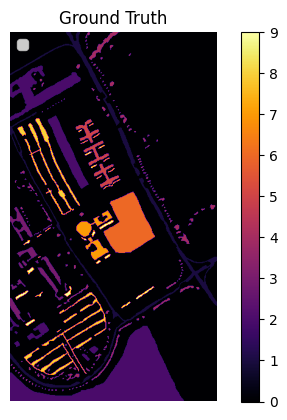

In [188]:
plt.figure(1)
plt.imshow(paviagt, cmap='inferno')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.gca().legend(np.unique(paviagt),
                 loc='upper left')
plt.show()

## <font color='springgreen'> 1 layer
we can get one of these images using ***[:, : , i]***.As it is later shown the attributes of them can be also extracted and then plotting them using matplotlib.

In [189]:
pavia[:,:,0]

array([[ 647,  604,  621, ...,  524,  528,  711],
       [ 705,  891,  547, ..., 1149,  917, 1037],
       [1084,  335, 1042, ...,  799,  226,  828],
       ...,
       [ 733,  785,  826, ...,  704,  376, 1146],
       [ 785,  856, 1088, ...,  717,  548,  768],
       [1006,  970, 1218, ...,  593,  593,  889]], dtype=uint16)

<function matplotlib.pyplot.show(close=None, block=None)>

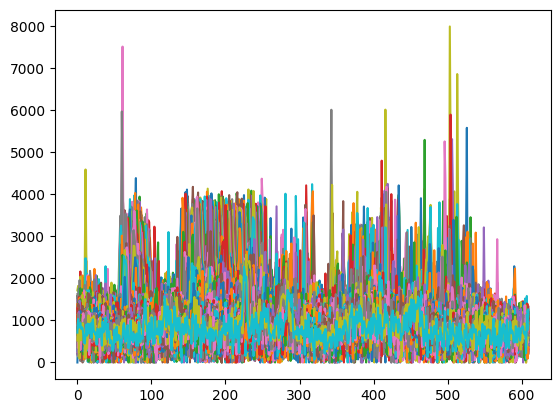

In [190]:
plt.plot(pavia[:,:,0])
plt.show

## <font color='springgreen'> Others layer
Then two more of these images are being plotted. The image is choosed by random. 

<function matplotlib.pyplot.show(close=None, block=None)>

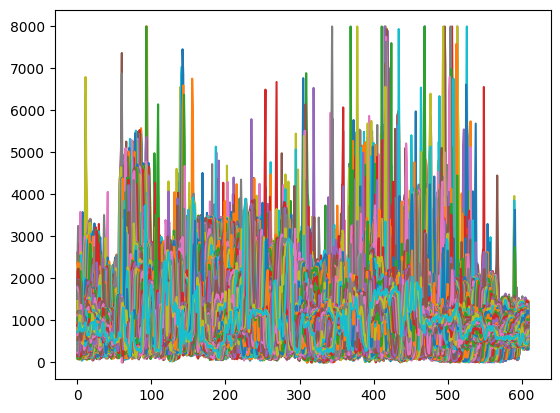

In [191]:
plt.plot(pavia[:,:,random.randrange(0, 103)])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

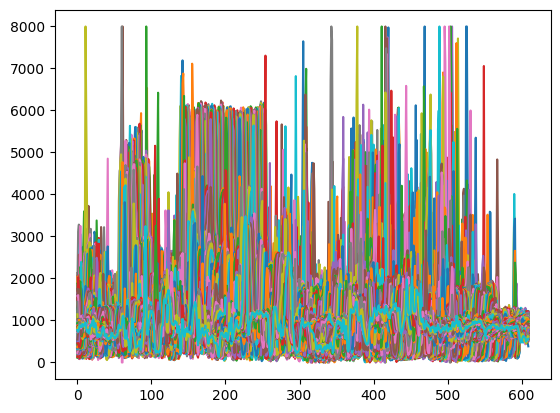

In [206]:
plt.plot(pavia[:,:,random.randrange(0, 103)])
plt.show

## <font color='springgreen'> Dataframe

These Data can also be converted into a DataFrame.  To do this, it requires to be reshaped. Then it can be used for other purposes.

In [205]:
pavia_rshp = pavia.reshape(207400,103)
pavia_df = pd.DataFrame(pavia_rshp)
pavia_df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,647,499,464,371,291,319,365,322,296,305,...,3420,3416,3335,3256,3226,3205,3210,3221,3238,3250
1,604,546,527,455,378,377,336,314,324,329,...,2605,2583,2538,2509,2511,2501,2468,2442,2464,2528
2,621,746,556,360,285,300,274,276,332,319,...,2282,2288,2242,2193,2202,2225,2266,2308,2345,2361
3,637,592,482,556,508,284,178,198,193,224,...,2684,2675,2609,2541,2551,2571,2569,2573,2620,2644
4,625,560,480,360,377,341,264,208,231,266,...,2423,2392,2344,2289,2328,2415,2424,2386,2431,2456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207395,574,594,504,411,468,443,378,342,352,434,...,2130,2150,2157,2157,2169,2151,2108,2077,2076,2136
207396,485,644,709,582,504,494,434,373,391,421,...,2218,2264,2295,2282,2265,2275,2293,2274,2274,2258
207397,593,387,428,461,470,392,331,383,439,355,...,2384,2393,2407,2433,2413,2373,2389,2382,2407,2423
207398,593,751,655,458,503,560,482,412,404,454,...,2338,2340,2333,2332,2288,2251,2280,2312,2308,2289


In [204]:
paviagt_df = pd.DataFrame(paviagt)
paviagt_df

,0,1,2,3,4,5,6,7,8,9,...,330,331,332,333,334,335,336,337,338,339
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
606,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
607,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
608,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
